## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2023-24 учебный год

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены автором. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано на [страничке датасета](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [ ]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [ ]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [ ]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [ ]:
# ٩(◕‿◕｡)۶
print(f"Пропуски в train {train.isna().any().any()}")
print(f"Дубликаты в train {train[train.duplicated()]}")

Пропуски в train False
Дубликаты в train Empty DataFrame
Columns: [tBodyAccMag-mean(), tBodyGyroJerk-mad()-X, tGravityAcc-min()-X, tBodyAcc-max()-X, fBodyAcc-bandsEnergy()-1,8.2, angle(X,gravityMean), angle(Y,gravityMean), angle(Z,gravityMean), fBodyAcc-skewness()-X, subject, Activity]
Index: []


In [ ]:
print(f"Пропуски в test {test.isna().any().any()}")
print(f"Дубликаты в test {test[test.duplicated()]}")

Пропуски в test False
Дубликаты в test Empty DataFrame
Columns: [tBodyAccMag-mean(), tBodyGyroJerk-mad()-X, tGravityAcc-min()-X, tBodyAcc-max()-X, fBodyAcc-bandsEnergy()-1,8.2, angle(X,gravityMean), angle(Y,gravityMean), angle(Z,gravityMean), fBodyAcc-skewness()-X, subject, Activity]
Index: []


Пропусков и дублей нет

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [ ]:
# (ノಠ益ಠ)ノ彡
train.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         7352.000000            7352.000000          7352.000000   
mean            -0.543884              -0.727735             0.678505   
std              0.477653               0.315832             0.508656   
min             -1.000000              -0.999889            -1.000000   
25%             -0.983282              -0.991595             0.804270   
50%             -0.883371              -0.950268             0.926693   
75%             -0.106892              -0.474625             0.965095   
max              1.000000               1.000000             1.000000   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       7352.000000                   7352.000000           7352.000000   
mean          -0.468604                     -0.847963             -0.489547   
std            0.544547                      0.233633              0.511807   
min           -1.000000                     -1.000000             -1.000000   
25%           -0.936219                     -0.999480             -0.812065   
50%           -0.881637                     -0.986582             -0.709417   
75%           -0.017129                     -0.764508             -0.509079   
max            1.000000                      1.000000              1.000000   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           7352.000000           7352.000000            7352.000000   
mean               0.058593             -0.056515              -0.128562   
std                0.297480              0.279122               0.403686   
min               -1.000000             -1.000000              -0.931208   
25%               -0.017885             -0.143414              -0.486841   
50%                0.182071              0.003181              -0.163271   
75%                0.248353              0.107659               0.155112   
max                0.478157              1.000000               1.000000   

           subject  
count  7352.000000  
mean     17.413085  
std       8.975143  
min       1.000000  
25%       8.000000  
50%      19.000000  
75%      26.000000  
max      30.000000

Можем заметить, что почти для всех признаков среднее намного меньше по модулю медианы, это значит, что данные имеют ассиметрию. Также интересно, что min и max в angle к разным осям равен -1 и 1 соответсвенно, кроме max к оси y. Он больше, чем в два раза меньше 1.

In [ ]:
test.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         2947.000000            2947.000000          2947.000000   
mean            -0.559043              -0.735661             0.696878   
std              0.439539               0.282074             0.502873   
min             -0.998936              -1.000000            -0.756774   
25%             -0.978433              -0.989078             0.836787   
50%             -0.861830              -0.914698             0.934930   
75%             -0.149596              -0.486423             0.970871   
max              0.479547               0.117606             0.996148   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       2947.000000                   2947.000000           2947.000000   
mean          -0.462063                     -0.880361             -0.513923   
std            0.523916                      0.160496              0.509205   
min           -0.952357                     -0.999989             -0.984195   
25%           -0.934447                     -0.999330             -0.829722   
50%           -0.852659                     -0.979336             -0.729648   
75%           -0.009965                     -0.799113             -0.545939   
max            0.786436                      0.048730              0.833180   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           2947.000000           2947.000000            2947.000000   
mean               0.074886             -0.048720              -0.154042   
std                0.324300              0.241467               0.392203   
min               -0.913704             -0.949228              -1.000000   
25%                0.022140             -0.098485              -0.497070   
50%                0.181563             -0.010671              -0.202050   
75%                0.260252              0.092373               0.140254   
max                1.000000              0.973113               0.960367   

           subject  
count  2947.000000  
mean     12.986427  
std       6.950984  
min       2.000000  
25%       9.000000  
50%      12.000000  
75%      18.000000  
max      24.000000

А в test уже наоборот: только в angle по оси х мах равен 1. Если в train много данных совпадало среди max и min, то здесь ничего не совпадает

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [ ]:
# ‿( ́ ̵ _-`)‿
train.groupby("Activity").size()

Activity
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
dtype: int64

In [ ]:
test.groupby("Activity").size()

Activity
LAYING                537
SITTING               491
STANDING              532
WALKING               496
WALKING_DOWNSTAIRS    420
WALKING_UPSTAIRS      471
dtype: int64

In [ ]:
min_Activity = train.groupby("Activity").size().min()
max_Activity = train.groupby("Activity").size().max()
print(f"Разница между самой маленькой и самой большой категорией в train составляет { round(100 - min_Activity / max_Activity  * 100) }%")

Разница между самой маленькой и самой большой категорией в train составляет 30%


In [ ]:
min_Activity = test.groupby("Activity").size().min()
max_Activity = test.groupby("Activity").size().max()
print(f"Разница между самой маленькой и самой большой категорией в test составляет { round(100 - min_Activity / max_Activity  * 100) }%")

Разница между самой маленькой и самой большой категорией в test составляет 22%


И в train, и в test данные сбалансированы, так как разница не превышает 30%

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [ ]:
# ( ͡° ͜ʖ ͡°)
train.corr()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.899080   
tBodyGyroJerk-mad()-X                   0.899080               1.000000   
tGravityAcc-min()-X                     0.369962               0.380118   
tBodyAcc-max()-X                        0.959827               0.879900   
fBodyAcc-bandsEnergy()-1,8.2            0.697832               0.507939   
angle(X,gravityMean)                   -0.370849              -0.382246   
angle(Y,gravityMean)                    0.495561               0.478567   
angle(Z,gravityMean)                    0.426283               0.380967   
fBodyAcc-skewness()-X                   0.379796               0.266002   
subject                                -0.073652              -0.110321   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.369962          0.959827   
tBodyGyroJerk-mad()-X                    0.380118          0.879900   
tGravityAcc-min()-X                      1.000000          0.380404   
tBodyAcc-max()-X                         0.380404          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.239088          0.613383   
angle(X,gravityMean)                    -0.988663         -0.384192   
angle(Y,gravityMean)                     0.797116          0.480229   
angle(Z,gravityMean)                     0.667415          0.405023   
fBodyAcc-skewness()-X                   -0.261676          0.335708   
subject                                 -0.042371         -0.055633   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.697832   
tBodyGyroJerk-mad()-X                             0.507939   
tGravityAcc-min()-X                               0.239088   
tBodyAcc-max()-X                                  0.613383   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.213318   
angle(Y,gravityMean)                              0.363170   
angle(Z,gravityMean)                              0.423927   
fBodyAcc-skewness()-X                             0.260316   
subject                                          -0.037000   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.370849              0.495561   
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)                      1.000000             -0.783848   
angle(Y,gravityMean)                     -0.783848              1.000000   
angle(Z,gravityMean)                     -0.643655              0.594885   
fBodyAcc-skewness()-X                     0.265523             -0.046213   
subject                                   0.026137             -0.009829   

                              angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
tBodyAccMag-mean()                        0.426283               0.379796   
tBodyGyroJerk-mad()-X                     0.380967               0.266002   
tGravityAcc-min()-X                       0.667415              -0.261676   
tBodyAcc-max()-X                          0.405023               0.335708   
fBodyAcc-bandsEnergy()-1,8.2              0.423927               0.260316   
angle(X,gravityMean)                     -0.643655               0.265523   
angle(Y,gravityMean)                      0.594885              -0.046213   
angle(Z,gravityMean)                      1.000000              -0.183815   
fBodyAcc-skewness()-X                    -0.183815               1.000000   
subject                                  -0.098712               0.019742   

                               subject  
tBodyAccMag-m

Сделаем более наглядно

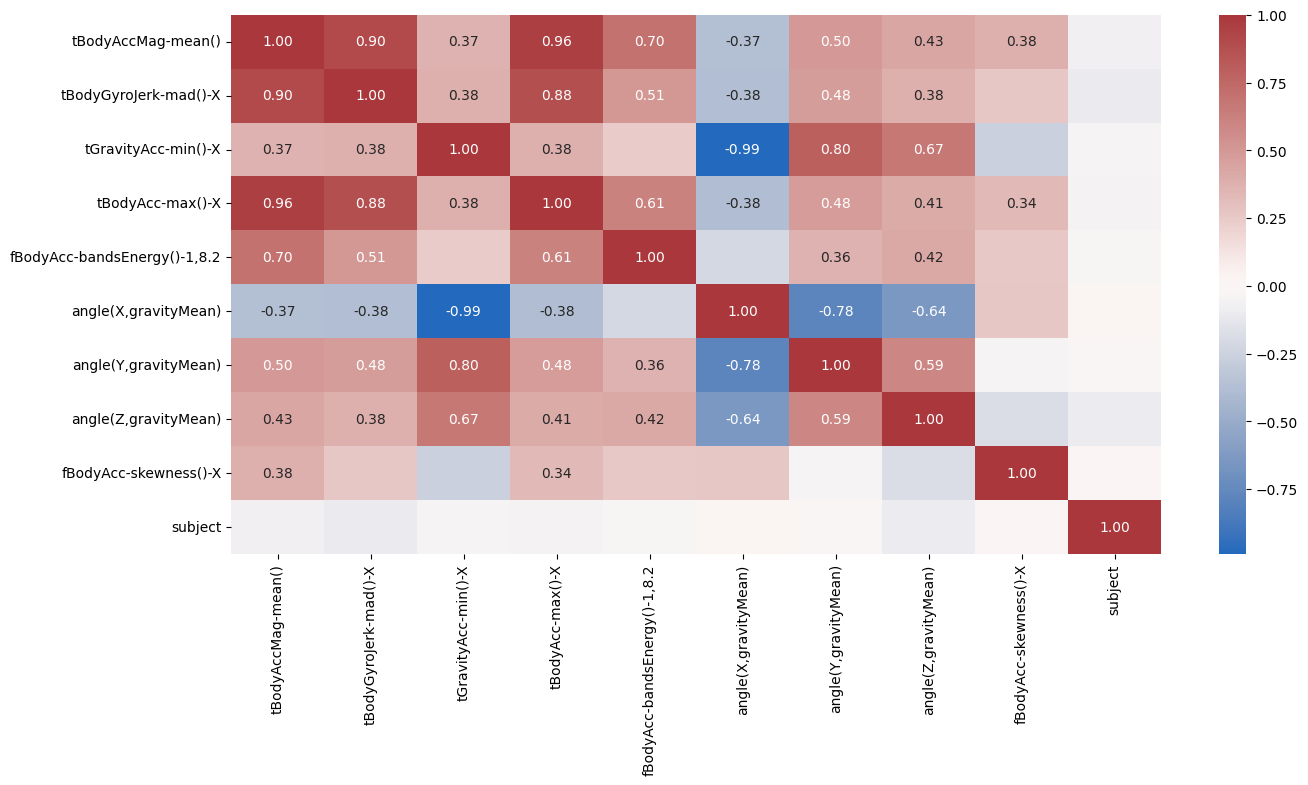

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.heatmap(train.corr(), cmap="vlag", annot=True, fmt="0.2f")
for t in ax.texts:
    if float(t.get_text()) >= 0.3 or float(t.get_text()) <= -0.3:
        t.set_text(t.get_text())
    else:
        t.set_text("")

Также посмотрим на test, если завивисимость не случайная, то в test она должна быть примерно такая же

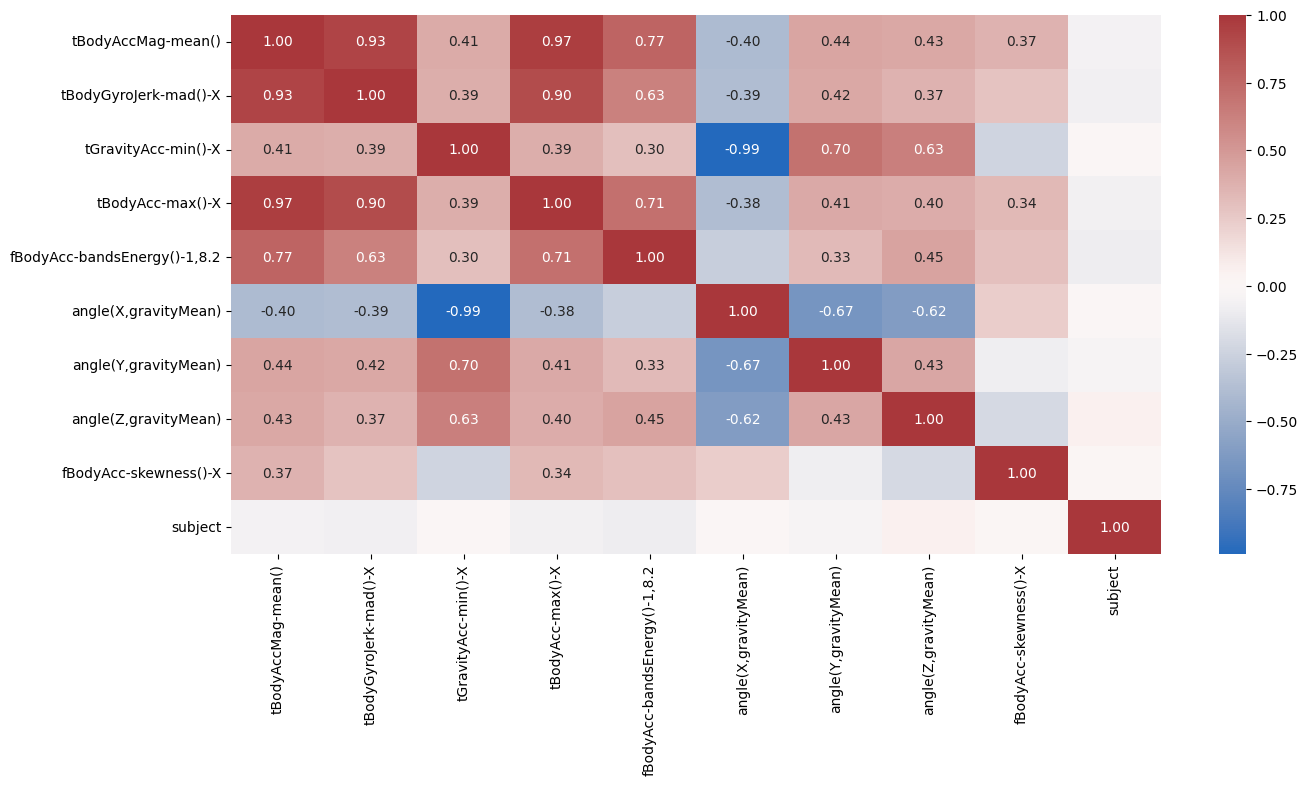

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.heatmap(test.corr(), cmap="vlag", annot=True, fmt="0.2f")
for t in ax.texts:
    if float(t.get_text()) >= 0.3 or float(t.get_text()) <= -0.3:
        t.set_text(t.get_text())
    else:
        t.set_text("")

Можем заметить сильную прямую линейную зависимость между средним ускорением тела и медианным значением рывка тела, так как ускорение происходит после рывка, то есть чем больше сделаешь рывок, тем быстрее побежишь, значит тем больше станет ускорение. Так как это средние и медианные значения, то наверное поэтому корреляция не 1, потому что медиана может отличаться от среднего, это значит, что существует ассиметрия, что было обнаружено выше.

Также очевидно, почему такая большая корреляция между средним значением ускорения и максимальных ускорением по оси х, ведь по сути это про один параметр, но в одном берем среднее, в другом мах. Чем выше среднее, тем вше мах, хотя иногда может быть и не так, но наверное здесь так, потому что в среднем у людей минимальные значения одинаковые - при простой ходьбе, а вот уже при беге выявляются большие различия

Ну и поэтому соответсвенно большая корреляция у медианным значением и максимальным.

Большую корреляцию можно заметить с минимумом гравитационной составляющей ускорения по оси Х и его углом на ось Х - тоже понятно почему, так как рассматриваем одну ось, а угол всегда зависит от значения. Тут мы можем понять, что зависимость линейная - обратная. С углами на оси y и z уже не так выражена линейная зависимость. Думаю, она есть, но просто не линейная

Остальные признаки между собой имеют либо среднюю линейную зависимость, либо почти никакую. Просто в одних случаях - совсем разные признаки, в других зависимость есть, но не линейная, так как например во многих физических формулах ускорение идет во 2 степени



Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

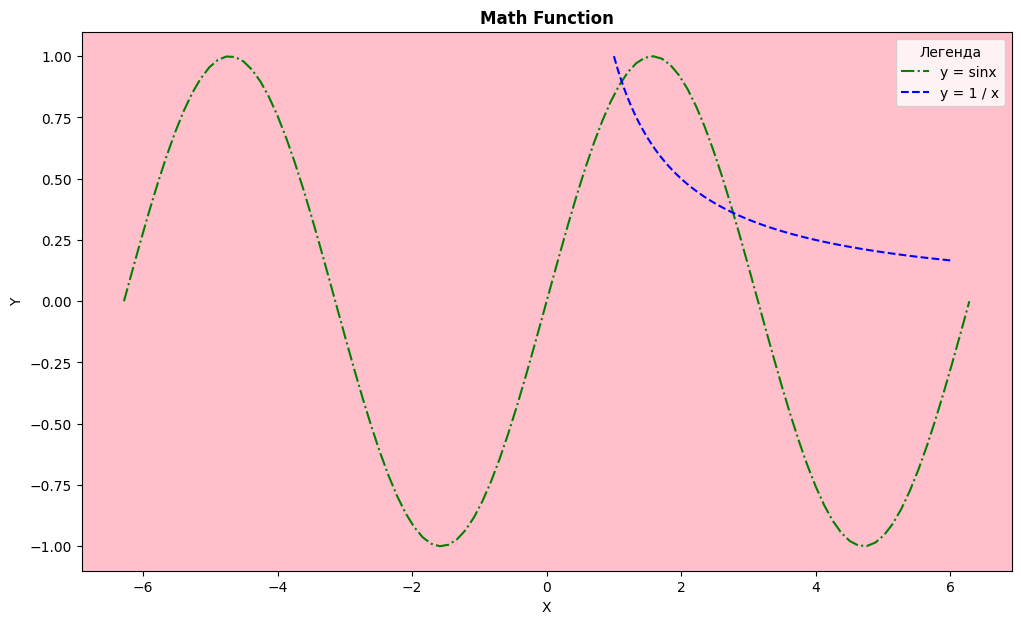

In [ ]:
x_1 = np.linspace(np.pi * (-2), 2 * np.pi, 100)
y_1 = np.sin(x_1)
x_2 = np.linspace(1, 6, 100)
y_2 = 1 / x_2

plt.figure(figsize=(12, 7))
ax = plt.axes()
ax.set_facecolor('pink')
plt.plot(x_1, y_1, 'g-.', x_2, y_2, 'b--')
plt.title("Math Function", fontweight='bold')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['y = sinx', 'y = 1 / x'], title='Легенда')
plt.show()

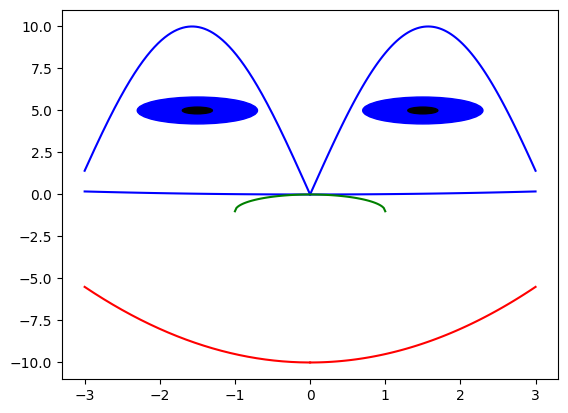

In [ ]:
# (╯°□°)--︻╦╤─
import math
x_1 = np.linspace(0, 3, 100)
x_2 = np.linspace(-3, 0, 1000)
y_1 = np.sin(x_1) * 10
y_2 = np.sin(x_2 - math.pi) * 10
y_3 = 1 / 2 * x_1 * x_1 - 10
y_4 = 1 / 2 * x_2 * x_2 - 10

x_5 = np.linspace(-3, 3, 100)
y_5 = x_5 * x_5 * 1/50;

x_6 = np.linspace(-1, 1, 100)
y_6 = np.sqrt(1 - x_6 * x_6) - 1

circle_1 = plt.Circle((-1.5, 5), 0.8, color='b')
circle_2 = plt.Circle((1.5, 5), 0.8, color='b')
circle_3 = plt.Circle((-1.5, 5), 0.2, color='black')
circle_4 = plt.Circle((1.5, 5), 0.2, color='black')


fig, ax = plt.subplots()
plt.plot(x_1, y_1, 'b', x_2, y_2, 'b', x_1, y_3, 'r', x_2, y_4, 'r', x_5, y_5,
         'b', x_6, y_6, 'g')
ax.add_patch(circle_1)
ax.add_patch(circle_2)
ax.add_patch(circle_3)
ax.add_patch(circle_4)

plt.show()

Мне захотелось порисовать) Это типо мордочка с глазками, носиком и улыбокой

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

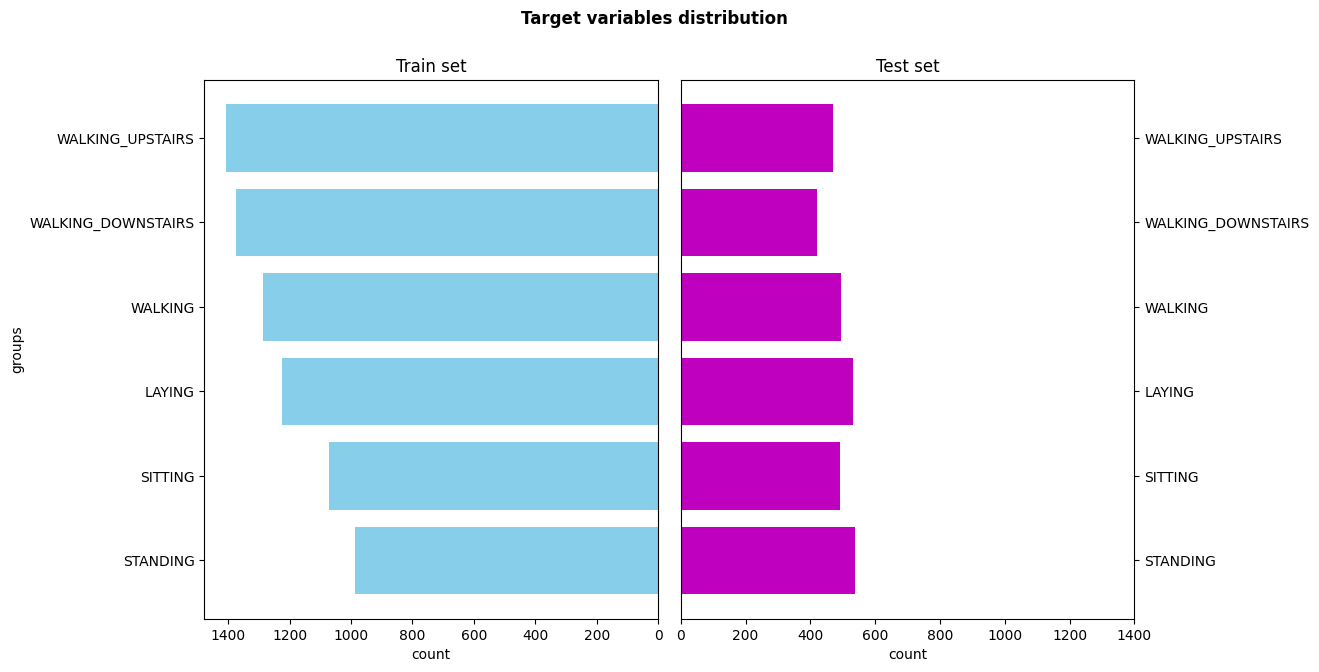

In [ ]:
# ̿' ̿'\̵͇̿̿\з=( ͡ °_̯͡° )=ε/̵͇̿̿/'̿'̿ ̿
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))
ax1.barh(train.loc[:, "Activity"].unique(), train.groupby("Activity").size().sort_values(), color = 'skyblue')
ax1.set_xticks(np.arange(0, 1600, step=200))
ax1.set_title("Train set")
ax1.invert_xaxis()


ax2.barh(test.loc[:, "Activity"].unique(), test.groupby("Activity").size(),
         color = "m")
ax2.set_xticks(np.arange(0, 1600, step=200))
ax2.set_title("Test set")
ax2.yaxis.tick_right()


plt.suptitle("Target variables distribution", fontweight='bold')
ax1.set_xlabel("count")
ax1.set_ylabel("groups")
ax2.set_xlabel("count")

fig.subplots_adjust(wspace=0.05)
plt.show()

Правда на таких графиках проще проверять баланс классов таргета?)

да

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

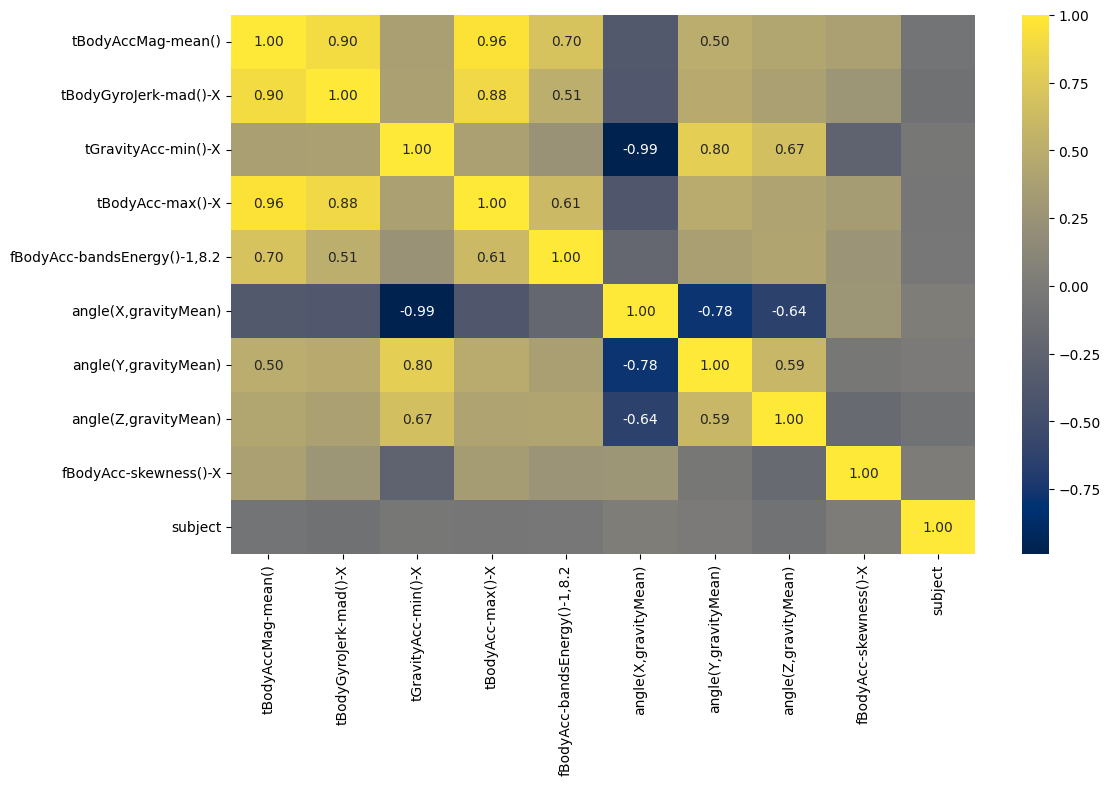

In [ ]:
# ღゝ◡╹)ノ♡
plt.figure(figsize=(12, 7))
ax = sns.heatmap(train.corr(), cmap="cividis", annot=True, fmt="0.2f")
for t in ax.texts:
    if abs(float(t.get_text())) >= 0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")

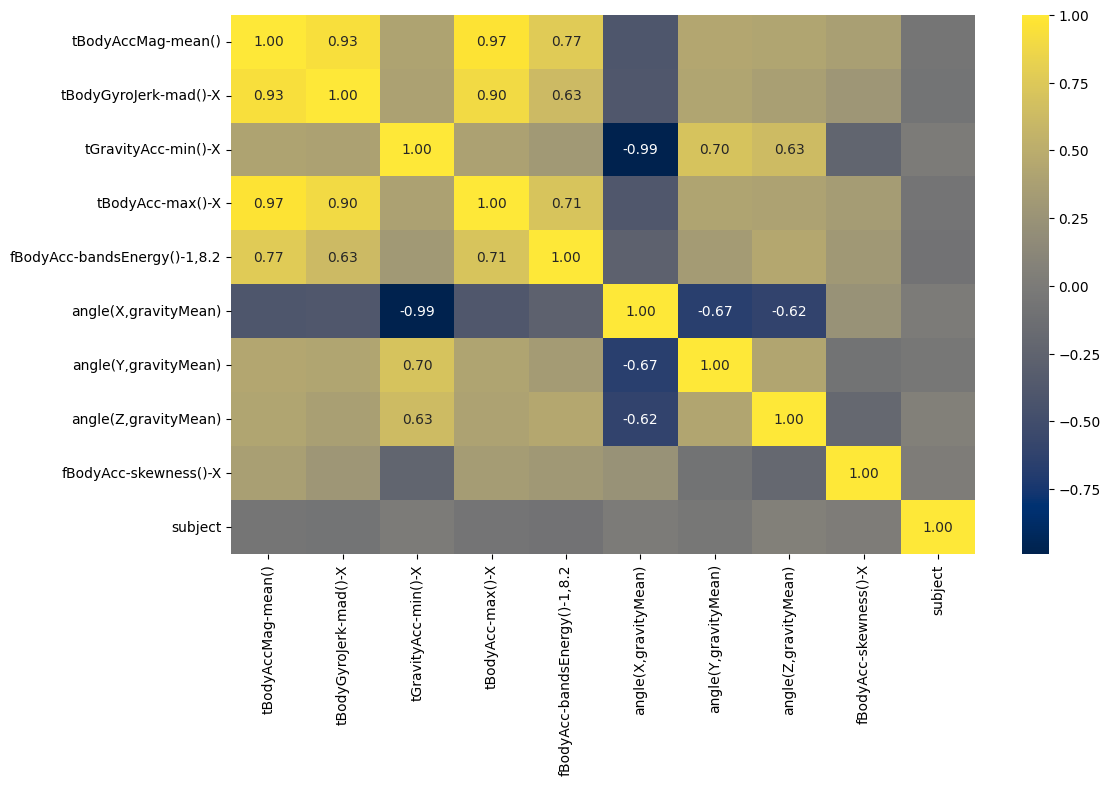

In [ ]:
# ღゝ◡╹)ノ♡
plt.figure(figsize=(12, 7))
ax = sns.heatmap(test.corr(), cmap="cividis", annot=True, fmt="0.2f")
for t in ax.texts:
    if abs(float(t.get_text())) >= 0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")

Стоит исключить признак "Subject", так как это просто номера испытуемого, который ни на что не влияет, именно поэтому и корреляции высокой с другими признаками у него нет. Под каким номеров участника записали - никак не влияет на его показатели

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

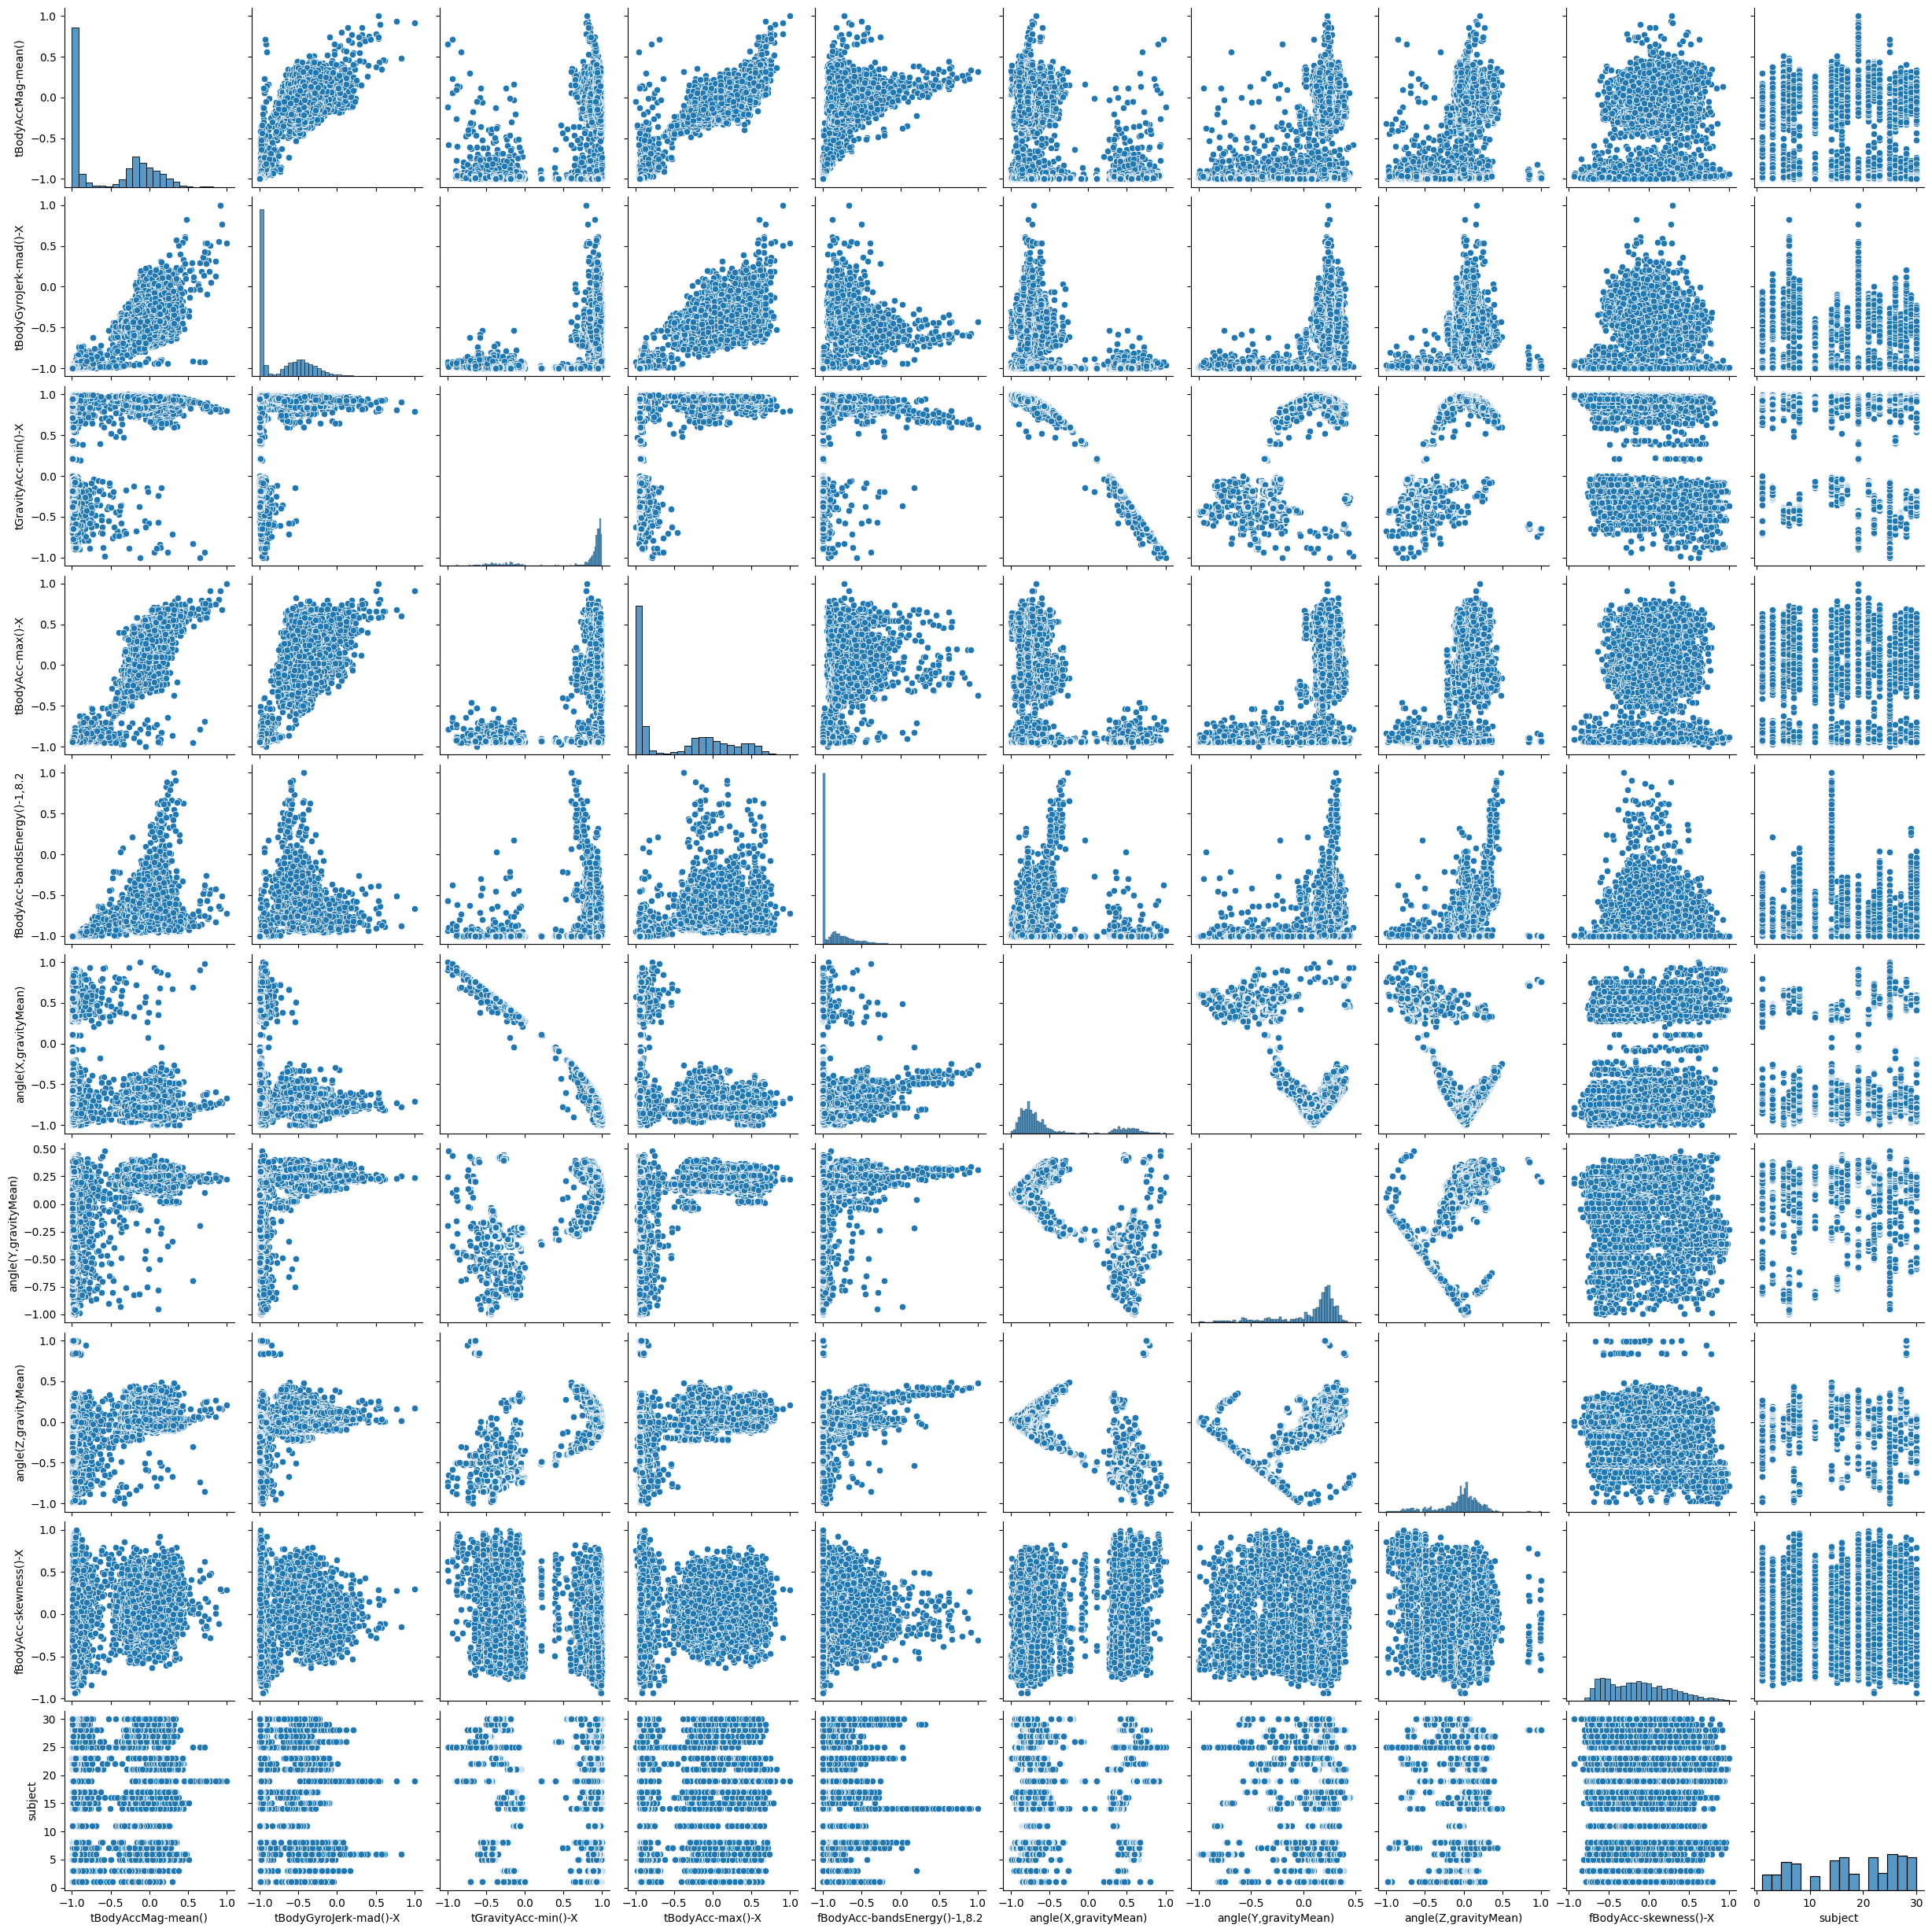

In [ ]:
# ♪ヽ( ⌒o⌒)人(⌒-⌒ )v ♪
sns.pairplot(train);

Очень сложно рассматривать такое количество графиков.По данным графикам можно понять, что все данные непрерывны (не считая subject). По некоторым графикам также видно, что нет не только линейной связи, а и любой другой. А на каких-то наоборот можно заметить например степенную зависимость. Также по таким графикам можно выявлять выбросы

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

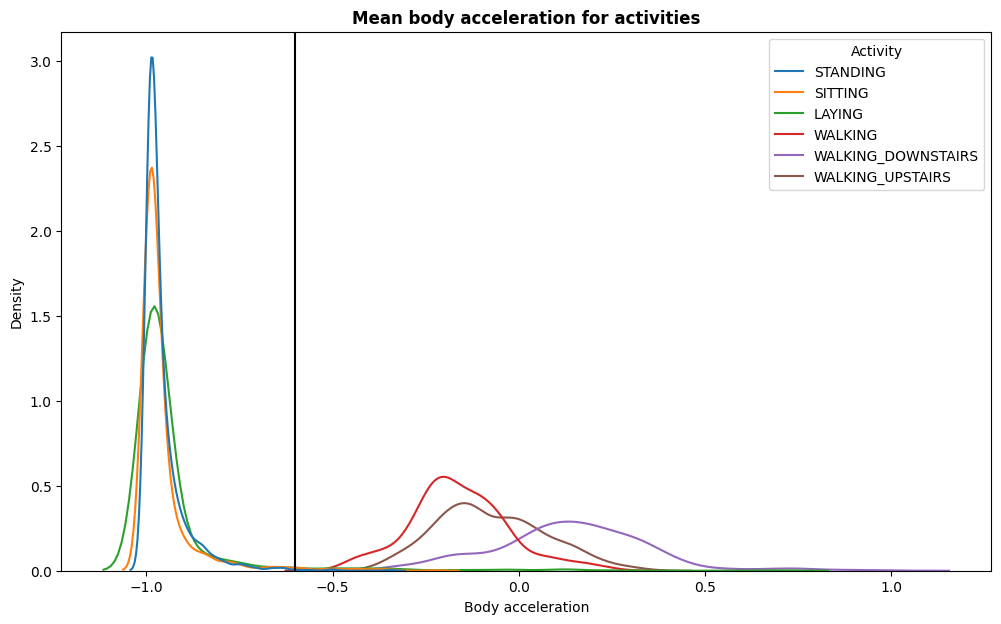

In [ ]:
# ʅ(◔౪◔ ) ʃ
plt.figure(figsize=(12, 7))
sns.kdeplot(train, x="tBodyAccMag-mean()", hue="Activity")
plt.axvline(-0.60, c="black");
plt.xlabel("Body acceleration")
plt.title("Mean body acceleration for activities", fontweight='bold')
plt.show()

Доля правильных ответов по данному признаку - 2/6. Так как Standing, sitting, laying почти не отличаются по показателям в данном признаке. Также почти не различаются и walking с walking_upstairs и walking_downstairs. Такое плохое разделение групп активностей возникает из-за схожести этих активностей в ускорении тела, например в Standing, sitting, laying ускорения вобще никакого нет. В прогулке и в прогулке вверх по лестнице ускорение тоже примерно одиннаковое, в первом случае немного побольше, но в обоих случаях оно явно меньше чем усокрение, когда мы идем вниз по лестнице.

В общем, по среднему ускорению тела можно определить - активность была статическая или динамическая. Если меньше -0,6, то динамическая, если больше, то статическая

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

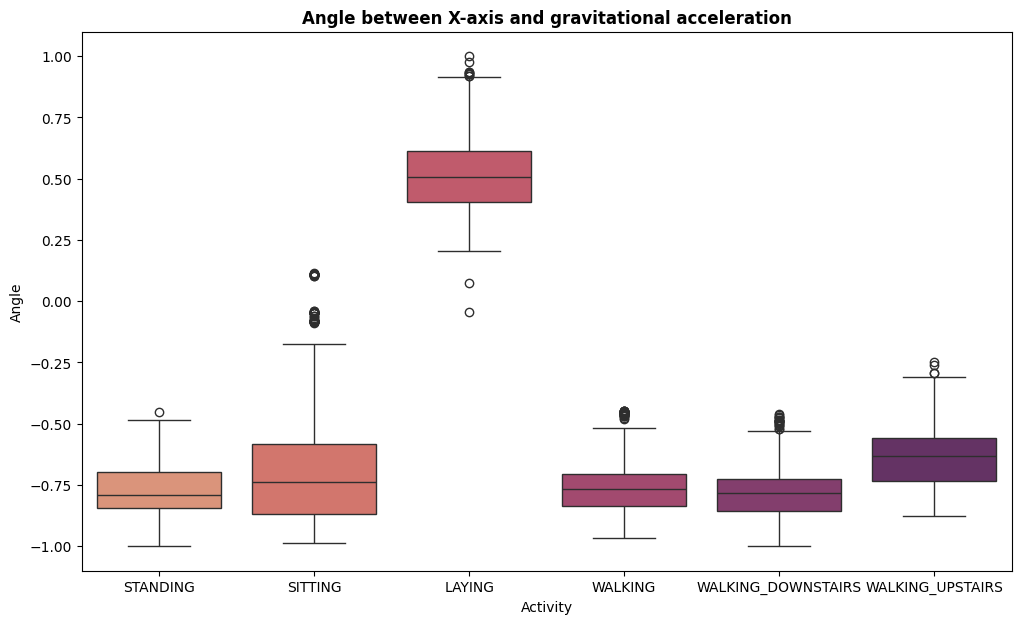

In [ ]:
# ^⨀ᴥ⨀^
plt.figure(figsize=(12, 7))
sns.boxplot(data=train, y="angle(X,gravityMean)", x="Activity", palette="flare")
plt.title("Angle between X-axis and gravitational acceleration", fontweight='bold')
plt.ylabel("Angle")
plt.show()

Можно сделать вывод, что laying сильно отличается от других - это довольно очевидно, так как когда мы ложимся наше положение относительно осей меняется, когда как в других активностях оно одно и тоже. Также можно заметить на данных диаграммах выбросы, например в Sitting их так много и они больше остальных отходят от медианы, потому что сидят люди по-разному - можно прямо и это почти не будет отличаться от STANDING в плане угла, а можно разложиться на стуле и такое положение уже будет ближе к лежанию, значит по углу к оси х можно определить активность - лежание.

В общем, если значение параметра больше 0,2, то можно говрить, что пользователь лежит

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

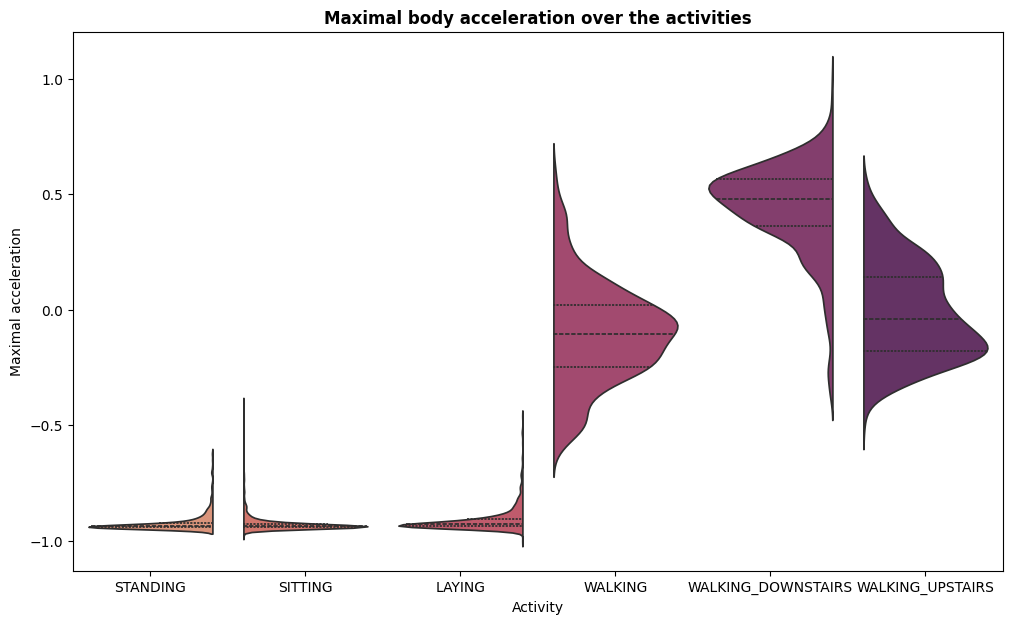

In [ ]:
# ( ͡☉ ͜ʖ ͡☉)
plt.figure(figsize=(12, 7))
sns.violinplot(data=train, y="tBodyAcc-max()-X", x="Activity", palette="flare",
               split=True, inner="quart")
plt.title("Maximal body acceleration over the activities", fontweight='bold')
plt.ylabel("Maximal acceleration")
plt.show()

По данному графику видим как выделяется Walking_downstairs. Понятно почему - ведь при спускании с лестницы мы усоряемся, то есть по этому параметру, если значение больше где-то 0,3, то мы точно спускаемся с лестницы

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (boxenplot - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

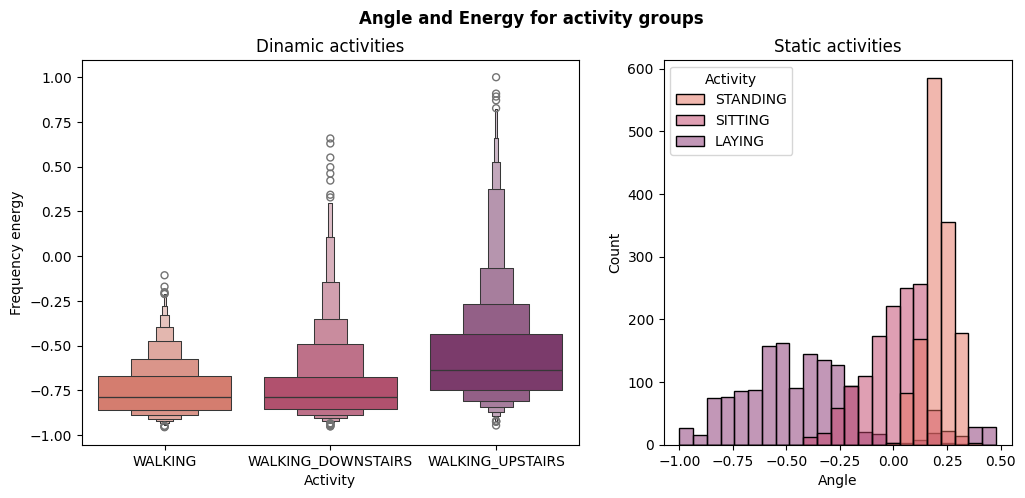

In [ ]:
# ‿( ́ ̵ _-`)‿

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5), gridspec_kw={'width_ratios': [10, 7]})

ax1_train = train[(train["Activity"] == "WALKING") | (train["Activity"] == "WALKING_DOWNSTAIRS") | (train["Activity"] == "WALKING_UPSTAIRS")]
sns.boxenplot(data=ax1_train, y="fBodyAcc-bandsEnergy()-1,8.2", x="Activity", palette="flare", ax=ax1)
ax1.set_title("Dinamic activities")
ax1.set_ylabel("Frequency energy")

ax2_train = train[(train["Activity"] == "STANDING") | (train["Activity"] == "SITTING") | (train["Activity"] == "LAYING")]
sns.histplot(data=ax2_train, x="angle(Y,gravityMean)", hue="Activity", palette="flare", ax=ax2)
ax2.set_title("Static activities")
ax2.set_xlabel("Angle")

plt.suptitle("Angle and Energy for activity groups", fontweight='bold')
plt.show()

На 2ом графике можно заметить, как очень сильно выделяется Standing и Laing, так как углы к оси Y также сильно различаются в этих положениях, то есть по углу к оси Y можем спокойно определить Standing или нет. То есть если угол меньше 0,3, то это лежание, если больше 0,15, то с большой вероятностью человек стоит. На 1ом графике выдялется ходьба по лестнице вверх, ведь при ней мы задействем больше энергии, так как это сложнее, чем просто ходьба и ходьба вниз по лестнице тем более, но сильных различий нет, то есть не всегда по этому параметру будет легко определить, что это именно walking_upstairs, но все таки если он больше 0,25, то с большой вероятностью это walking_upstairs

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

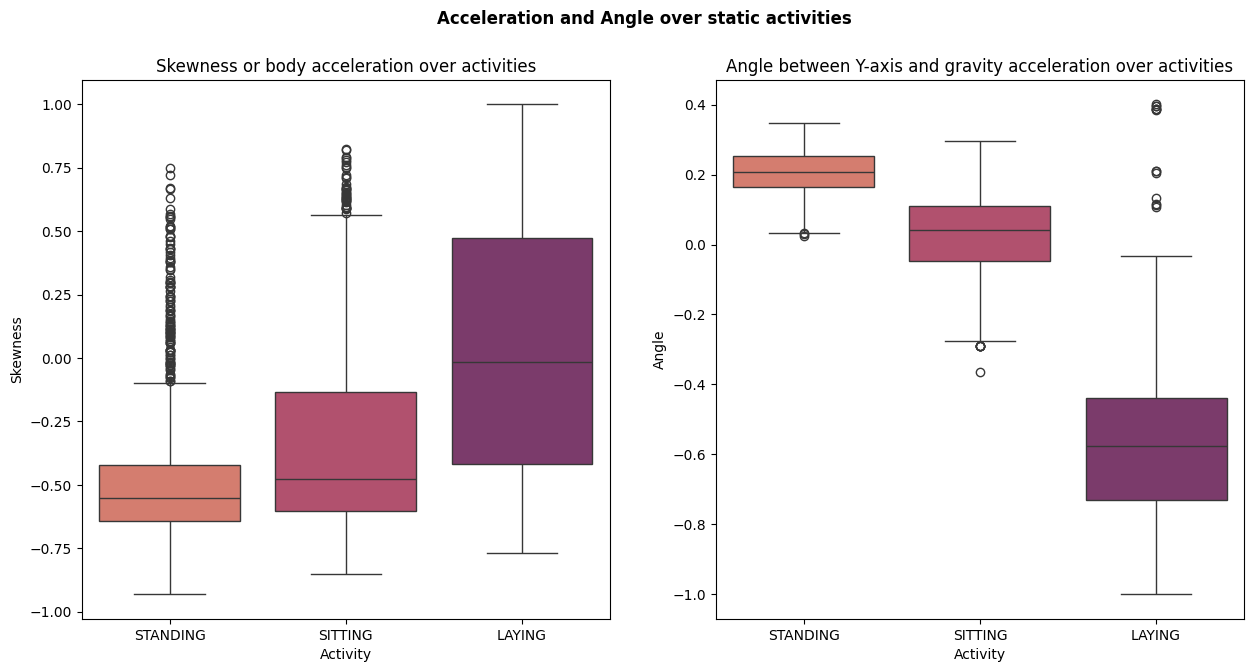

In [ ]:
# (ಠ_ಠ)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))

ax1_train = train[(train["Activity"] == "STANDING") | (train["Activity"] == "SITTING") | (train["Activity"] == "LAYING")]
sns.boxplot(data=ax1_train, y="fBodyAcc-skewness()-X", x="Activity", palette="flare", ax=ax1)
ax1.set_ylabel("Skewness")
ax1.set_title("Skewness or body acceleration over activities")

ax2_train = train[((train["Activity"] == "STANDING") | (train["Activity"] == "SITTING") | (train["Activity"] == "LAYING")) & (train['fBodyAcc-skewness()-X'] < -0.376)]
sns.boxplot(data=ax2_train, y="angle(Y,gravityMean)", x="Activity", palette="flare", ax=ax2)
ax2.set_ylabel("Angle")
ax2.set_title("Angle between Y-axis and gravity acceleration over activities")

plt.suptitle("Acceleration and Angle over static activities", fontweight='bold')
plt.show()

и так, получается если вышло так, что Skewness меньше -0,376 и угол меньше около -0,3, то это будет Laying с 0,99 вероятность (просто у Sitting есть еще выброс, а значит есть шанс, что опять туда попадем), а еслм от -0,2 до 01, то сидит

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

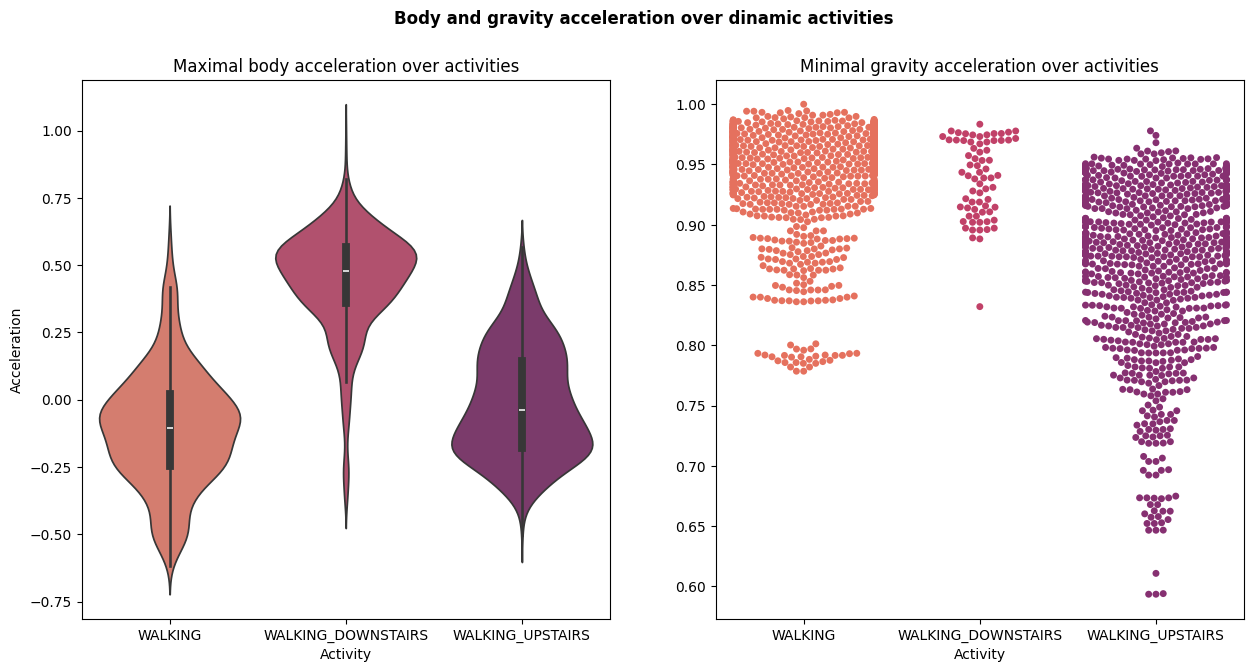

In [ ]:
# (✖╭╮✖)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))

ax1_train = train[(train["Activity"] == "WALKING") | (train["Activity"] == "WALKING_DOWNSTAIRS") | (train["Activity"] == "WALKING_UPSTAIRS")]
sns.violinplot(data=ax1_train, y="tBodyAcc-max()-X", x="Activity", palette="flare", ax=ax1)
ax1.set_title("Maximal body acceleration over activities")
ax1.set_ylabel("Acceleration")

ax2_train = train[((train["Activity"] == "WALKING") | (train["Activity"] == "WALKING_DOWNSTAIRS") | (train["Activity"] == "WALKING_UPSTAIRS")) & (train['tBodyAcc-max()-X'] < 0.157)]
sns.swarmplot(data=ax2_train, y="tGravityAcc-min()-X", x="Activity", palette="flare", ax=ax2)
ax2.set_title("Minimal gravity acceleration over activities")
ax2.set_ylabel("")

plt.suptitle("Body and gravity acceleration over dinamic activities", fontweight='bold')
plt.show()

Вообще, у меня получилось, что 2 активити не выделены - walking и walkin_upstairs. Здесь, если acceleration тела вышел меньше 0,157, то если acceleration gravity больше 0,99, то это walking, а если меньше 0,765, то walking_upstairs

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [ ]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 6min 43s, sys: 606 ms, total: 6min 43s
Wall time: 3min 53s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [ ]:
df_2_comp.head()

x          y  Activity
0 -25.520004 -20.739208  STANDING
1  22.175642 -71.424644  STANDING
2  23.656492 -70.702286  STANDING
3  13.737759 -69.566162  STANDING
4  20.227449 -70.275978  STANDING

In [ ]:
# ʅ(◔౪◔ ) ʃ
import plotly.express as px

px.scatter(data_frame=df_2_comp, x='x', y="y", color='Activity', color_discrete_sequence=px.colors.qualitative.Set2)

Видно, как от всех отделяется Laying, остальные линией не разделить, есть большие пересечения

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [ ]:
# (✧≖‿ゝ≖)
px.scatter_3d(data_frame=df_2_comp, x='x', y="y", z='Activity', color='Activity', color_discrete_sequence=px.colors.qualitative.Set2)

Очень красиво, но тоже самое, что сверху, только в трехмерном пространстве, ничего такого не выделяется, чего нет ссверху

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шапргалка с готовыми идеями для такой задачи](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

In [ ]:
train.head()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0           -0.959434              -0.992165             0.977436   
1           -0.979289              -0.989876             0.984520   
2           -0.983703              -0.987868             0.986770   
3           -0.986542              -0.991241             0.986821   
4           -0.992827              -0.992882             0.987434   

   tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0         -0.934724                     -0.993592             -0.841247   
1         -0.943068                     -0.998235             -0.844788   
2         -0.938692                     -0.999388             -0.848933   
3         -0.938692                     -0.999807             -0.848649   
4         -0.942469                     -0.999806             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  subject  \
0              0.179941             -0.058627               0.142051        1   
1              0.180289             -0.054317              -0.692541        1   
2              0.180637             -0.049118              -0.727227        1   
3              0.181935             -0.047663              -0.599118        1   
4              0.185151             -0.043892              -0.676997        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING

In [ ]:
def predict(df: pd.DataFrame):
    ans = [''] * len(df)
    for i in range(len(df)):
        row = df.iloc[i]
        if row['tBodyAccMag-mean()'] <= -0.5:
            if row['angle(X,gravityMean)'] > 0 or (row['fBodyAcc-skewness()-X'] < -0.376 and row['angle(Y,gravityMean)'] < -0.4):
                ans[i] = 'LAYING'
            elif row['angle(Y,gravityMean)'] > 0.12 and row['angle(Y,gravityMean)'] < 0.4:
                ans[i] = 'STANDING'
            elif row['angle(Y,gravityMean)'] > -0.3 and row['angle(Y,gravityMean)'] < 0.12:
                ans[i] = 'SITTING'
            else:
                ans[i] = 'SITTING'
        else:
            if row['fBodyAcc-bandsEnergy()-1,8.2'] > -0.3 or (row['tBodyAcc-max()-X'] < 0.157 and row['tGravityAcc-min()-X'] < 0.9):
                ans[i] = 'WALKING_UPSTAIRS'
            elif row['tBodyAcc-max()-X'] > 0.09 or row['tBodyAccMag-mean()'] > 0.3:
                ans[i] = 'WALKING_DOWNSTAIRS'
            elif row['tBodyAcc-max()-X'] < 0.157 and row['tGravityAcc-min()-X'] > 0.95 or row['tBodyAcc-max()-X'] < -0.4:
                ans[i] = 'WALKING'
            else:
                ans[i] = 'WALKING'
    return ans

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [ ]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.8215451577801959
Accuracy on test set => 0.7872412623006447


Получив сперва плохую точность, а заново начала анализировать графики и смотреть новые пороги, у меня уже не хватило сил переписывать описание к ним, но можно в программе посмотерть на новые пороги. Я поняла, что нужно брать не прям там, где значения только из одной группы, а что можно чтобы были пересечния - то есть ничего страшного, если какие-то значения заходят в область этой группы - особенно с нашими данными, где на последних облаках рассеивания видно как группы сильно пересекаются

Но я так рада своей точности!!! Спасибо за это дз, большего счастья я не получала

__Место для мема и/или фидбэка__